### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

In [39]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

def plot(plate, mjd, fiber):
    spec = fetch_sdss_spectrum(plate, mjd, fiber)

    #------------------------------------------------------------
    # Plot the resulting spectrum
    ax = plt.axes()
    ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
    ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

    ax.legend(loc=4)

    ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

    ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'$\lambda (\AA)$')
    ax.set_ylabel('Flux')

    #ax.set_ylim(-10, 300)

    plt.show()
    

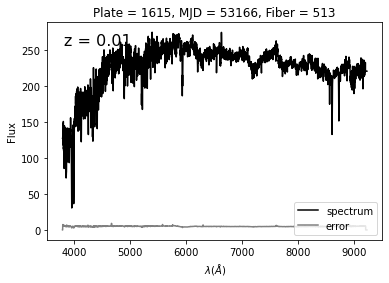

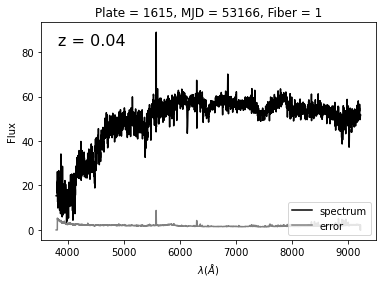

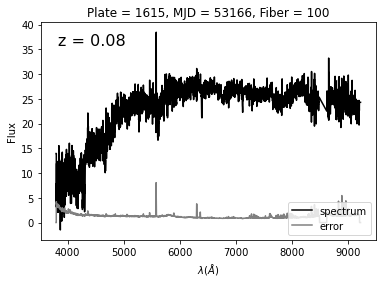

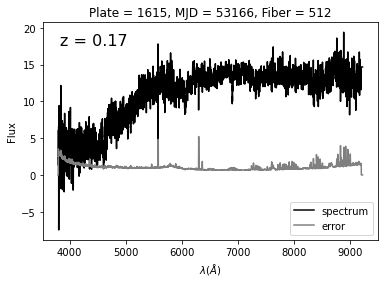

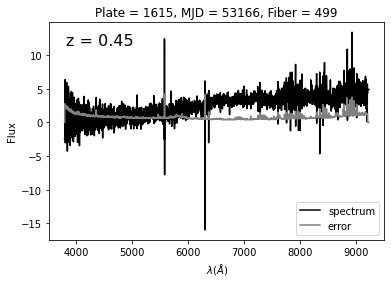

In [40]:
plate = 1615
mjd = 53166
fiber = 513
plot(plate, mjd, fiber) #z = 0.01

plate = 1615
mjd = 53166
fiber = 1
plot(plate, mjd, fiber) #z = 0.04

plate = 1615
mjd = 53166
fiber = 100
plot(plate, mjd, fiber) #z = 0.08

plate = 1615
mjd = 53166
fiber = 512
plot(plate, mjd, fiber) # z = 0.17

plate = 1615
mjd = 53166
fiber = 499
plot(plate, mjd, fiber) #z = 0.45

As the redshift increases the flux of the spectum decreases. There are still spikes at similar points between all the different redshifts, but it is much less noticable as the redshift increases. Additionally, the spectrum becomes more thin and more flat and the error gets much closer to the spectum flux amplitude.

In [23]:
from astroML.datasets import fetch_sdss_specgals

data = fetch_sdss_specgals()

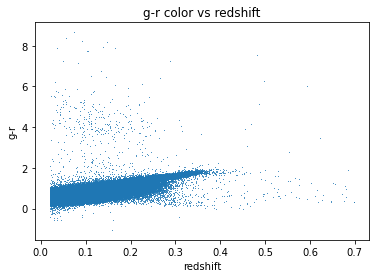

In [43]:
g = data['modelMag_g']
r = data['modelMag_r']
rPetro = data['petroMag_r']

plt.figure()
ax = plt.axes()
plt.scatter(data['z'], g - r, s=1, lw=0)


plt.ylabel('g-r')
plt.xlabel('redshift')
plt.title("g-r color vs redshift")
plt.show()

As the redshift increases the g-r color also increases. This makes sense because at larger redshift the light is more redshifted and moved towards a redder part of the spectrum. This coincides with a larger g-r color which means an object is more red.

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



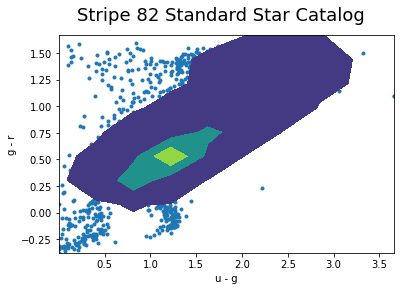

In [86]:
import numpy as np
from astroML.plotting import MultiAxes, scatter_contour
from astroML.datasets import fetch_sdss_S82standards

data = fetch_sdss_S82standards()

# select the first 10000 points
data = data[:100000]

# select the mean magnitudes for u, g, r, i, z
u = data['mmu_u']
g = data['mmu_g']
r = data['mmu_r']
#i = data['mmu_i']
#z = data['mmu_z']

ax = scatter_contour((u-g)[(u-g)>0], (g-r)[(u-g)>0], levels=4)

plt.xlabel('u - g')
plt.ylabel('g - r')
plt.suptitle('Stripe 82 Standard Star Catalog', fontsize=18)

plt.show()